### Download required Python modules

In [658]:
!pip3 install sklearn
!pip3 install pandas
!pip3 install matplotlib
!pip3 install pyshp
!pip3 install pyproj

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


### Import modules

In [37]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import shapefile as shp
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from pyproj import Proj, transform
import pyproj


In [38]:
dtypes = {'Insee code': 'string', 'Postal code': 'string', 'City Name': 'string', 'Department': 'string'}
df = pd.read_csv("../outputs/idf_building_score.csv").astype(dtypes)
df#.sort_values(by="Building Score", ascending=False)

,Insee code,Postal code,City Name,Department,Population,Number of Building Permit,Building Score,GeoPoint
0,94069,94410,SAINT-MAURICE,VAL-DE-MARNE,14.4,224,15.555556,"48.8184921372,2.4374501342"
1,92009,92270,BOIS-COLOMBES,HAUTS-DE-SEINE,28.2,46,1.631206,"48.9153368426,2.26738552597"
2,95268,95140,GARGES-LES-GONESSE,VAL-D'OISE,40.2,302,7.512438,"48.9701231267,2.40534038501"
3,94003,94110,ARCUEIL,VAL-DE-MARNE,19.5,503,25.794872,"48.8058803597,2.33351024984"
4,91228,91000,EVRY,ESSONNE,52.4,753,14.370229,"48.6294831659,2.44008244492"
...,...,...,...,...,...,...,...,...
261,92019,92290,CHATENAY-MALABRY,HAUTS-DE-SEINE,32.4,1674,51.666664,"48.7681690197,2.26282598525"
262,95539,95350,SAINT-BRICE-SOUS-FORET,VAL-D'OISE,14.2,6,0.422535,"49.0019033624,2.35030688962"
263,77337,77186,NOISIEL,SEINE-ET-MARNE,15.5,355,22.903225,"48.8460926469,2.61997100426"
264,91692,91940,LES ULIS,ESSONNE,24.7,55,2.226721,"48.680321482,2.18518955"


In [39]:

df.sort_values(by="Population")


,Insee code,Postal code,City Name,Department,Population,Number of Building Permit,Building Score,GeoPoint
265,91216,91360,EPINAY-SUR-ORGE,ESSONNE,10.1,319,31.584158,"48.672618112,2.31834586071"
252,78190,78290,CROISSY-SUR-SEINE,YVELINES,10.1,252,24.950495,"48.8787825592,2.13541164589"
156,91312,91430,IGNY,ESSONNE,10.1,147,14.554455,"48.7362250613,2.22442021749"
259,91021,91290,ARPAJON,ESSONNE,10.4,144,13.846154,"48.5908921647,2.24349117607"
249,95487,95340,PERSAN,VAL-D'OISE,10.4,106,10.192308,"49.1497441715,2.26978393249"
...,...,...,...,...,...,...,...,...
163,75113,75013,PARIS-13E-ARRONDISSEMENT,PARIS,182.0,1746,9.593407,"48.8287176845,2.36246822852"
95,75119,75019,PARIS-19E-ARRONDISSEMENT,PARIS,184.8,1429,7.732684,"48.886868623,2.38469432787"
50,75120,75020,PARIS-20E-ARRONDISSEMENT,PARIS,197.1,730,3.703704,"48.8631867774,2.40081982673"
80,75118,75018,PARIS-18E-ARRONDISSEMENT,PARIS,200.6,1289,6.425723,"48.8927350746,2.34871193387"


[[-0.65321474]
 [ 1.77285247]
 [ 0.34825349]
 [ 3.88746041]]
[-0.6532147410679326, 1.7728524742048768, 0.3482534920521218, 3.887460408425436]


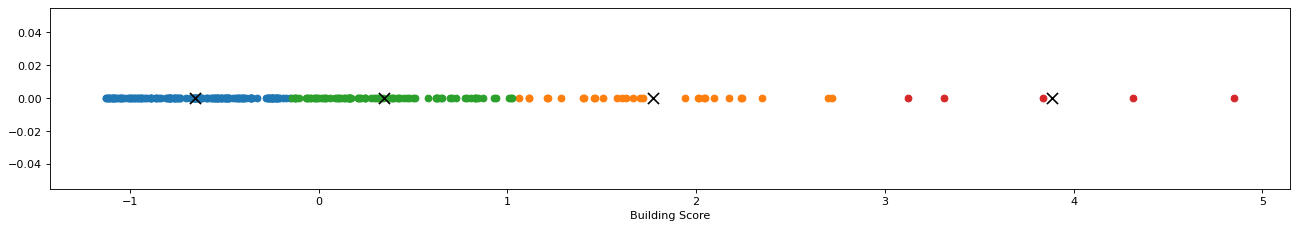

,Insee code,Postal code,City Name,Department,Population,Number of Building Permit,Building Score,Building class,GeoPoint
0,94069,94410,SAINT-MAURICE,VAL-DE-MARNE,14.4,224,15.555556,0,"48.8184921372,2.4374501342"
1,92009,92270,BOIS-COLOMBES,HAUTS-DE-SEINE,28.2,46,1.631206,0,"48.9153368426,2.26738552597"
2,95268,95140,GARGES-LES-GONESSE,VAL-D'OISE,40.2,302,7.512438,0,"48.9701231267,2.40534038501"
3,94003,94110,ARCUEIL,VAL-DE-MARNE,19.5,503,25.794872,2,"48.8058803597,2.33351024984"
4,91228,91000,EVRY,ESSONNE,52.4,753,14.370229,0,"48.6294831659,2.44008244492"
...,...,...,...,...,...,...,...,...,...
261,92019,92290,CHATENAY-MALABRY,HAUTS-DE-SEINE,32.4,1674,51.666664,1,"48.7681690197,2.26282598525"
262,95539,95350,SAINT-BRICE-SOUS-FORET,VAL-D'OISE,14.2,6,0.422535,0,"49.0019033624,2.35030688962"
263,77337,77186,NOISIEL,SEINE-ET-MARNE,15.5,355,22.903225,2,"48.8460926469,2.61997100426"
264,91692,91940,LES ULIS,ESSONNE,24.7,55,2.226721,0,"48.680321482,2.18518955"


In [40]:
building_scores = df.loc[:,["Insee code","Building Score"]].to_numpy()
scaler = StandardScaler()
scaled_bscores = scaler.fit_transform([[v[1]] for v in building_scores])
n_clusters = 4
kmeans = cluster.KMeans(n_clusters=n_clusters).fit(scaled_bscores)
# kmeans = cluster.DBSCAN(eps=0.3).fit([[v[1]] for v in building_scores])

print(kmeans.cluster_centers_)

labels = kmeans.labels_
n = len(labels)

P = [[] for k in range(n_clusters)]

for i in range(n) :
    for k in range(n_clusters) :
        if labels[i] == k :
            P[k].append(scaled_bscores[i][0])
            break

# print(len(P[1]),len(P[2]),len(P[0]))

plt.figure(figsize=(20, 3), dpi=80)

for k in range(n_clusters) :
    plt.scatter(P[k],[0 for e in P[k]])

print([ center[0] for center in kmeans.cluster_centers_])
plt.scatter([ center[0] for center in kmeans.cluster_centers_], [0 for k in range(n_clusters)],color='black',marker='x',s=100)

plt.xlabel("Building Score")
plt.show()

df.insert(7,"Building class",labels)
df





In [41]:
def plot_shape(shape) :
    points=shape.points
    X,Y = [],[]
    for (x,y) in points :
        X.append(x)
        Y.append(y)
    plt.plot(X,Y,color="black")

def plot_IDF() :
    sf = shp.Reader("../data/geoflar-departements.shp")

    for shape in sf.shapes() :
        plot_shape(shape)
        
def plot_GPE() :
    sf_gpe = shp.Reader("../data/GPE_GARE_LOCALISATION.shp")

    inProj = Proj(init='epsg:3949')
    outProj = Proj(init='epsg:4326')

    X,Y=[],[]
    for shape in sf_gpe.shapes() : 
        # print("shape")
        [[x1,y1]]=shape.points
        x2,y2 = transform(inProj,outProj,x1,y1)
        # print(x2,y2)
        X.append(x2)
        Y.append(y2)
    plt.scatter(X,Y,color="purple",s=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


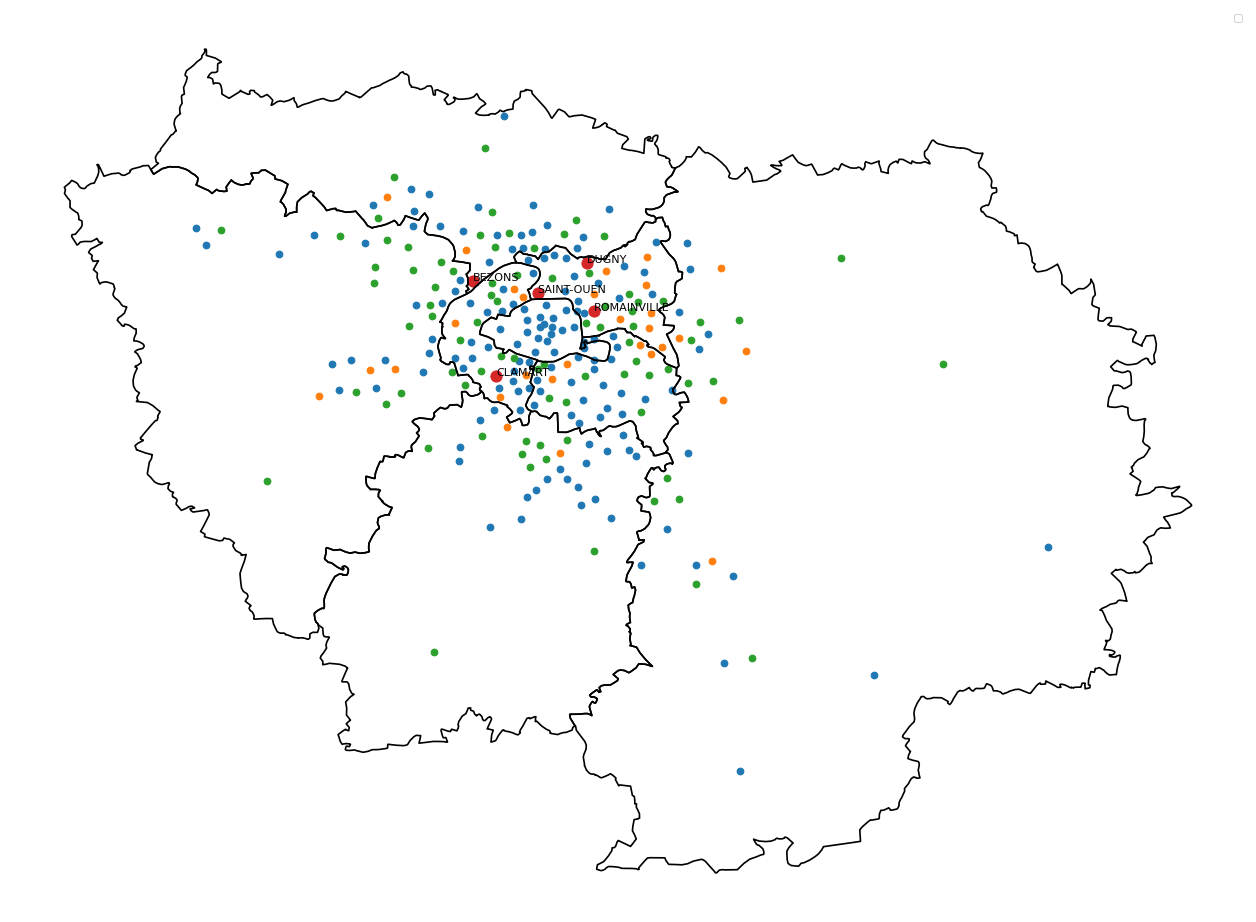

In [42]:
G = [ [[],[],[]] for k in range(n_clusters) ]
first_value = [ [] for k in range(n_clusters) ]

for index,row in df.iterrows(): 
    for k in range(n_clusters) :
        if row["Building class"] == k :
            if len(first_value[k])==0 :
                first_value[k].append(float(row["Building Score"]))
            [lat, lon] = list(map(float,row["GeoPoint"].split(","),))
            G[k][0].append(lat)
            G[k][1].append(lon)
            G[k][2].append(row["City Name"])
            break

first_value = [value[0] for value in first_value]
high_class = first_value.index(max(first_value))



fig = plt.figure(figsize=(20, 15), dpi=80)

# plt.title("Île-de-France Building score clusterization",fontsize=20)

## PLOTING IDF

plot_IDF()

## PLOTTING CITIES


for k in range(n_clusters) :
    if k == high_class : plt.scatter(G[k][1],G[k][0],s=100)
    else : plt.scatter(G[k][1],G[k][0])


[x,y,label] = G[high_class]

for i in range(len(x)) :
    plt.annotate(label[i],(y[i],x[i]))

plt.axis('off')
plt.legend()
plt.show()



In [43]:
df.sort_values(by="Building Score", ascending=False)

,Insee code,Postal code,City Name,Department,Population,Number of Building Permit,Building Score,Building class,GeoPoint
250,93070,93400,SAINT-OUEN,SEINE-SAINT-DENIS,46.5,5536,119.053764,3,"48.909806575,2.33257042205"
91,93030,93440,DUGNY,SEINE-SAINT-DENIS,10.5,1139,108.476190,3,"48.9503408732,2.4238637503"
17,92023,92140,CLAMART,HAUTS-DE-SEINE,52.6,5204,98.935360,3,"48.7964306792,2.25474652922"
55,95063,95870,BEZONS,VAL-D'OISE,28.0,2478,88.500000,3,"48.9259810125,2.21133387765"
100,93063,93230,ROMAINVILLE,SEINE-SAINT-DENIS,25.8,2187,84.767440,3,"48.8852118968,2.43767884231"
...,...,...,...,...,...,...,...,...,...
262,95539,95350,SAINT-BRICE-SOUS-FORET,VAL-D'OISE,14.2,6,0.422535,0,"49.0019033624,2.35030688962"
175,75102,75002,PARIS-2E-ARRONDISSEMENT,PARIS,22.4,8,0.357143,0,"48.8679033789,2.34410716666"
105,91182,91080,COURCOURONNES,ESSONNE,14.0,4,0.285714,0,"48.6216349774,2.41288009058"
226,91215,91860,EPINAY-SOUS-SENART,ESSONNE,12.4,2,0.161290,0,"48.6871527113,2.51577225487"


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-41-5ac0c10856a1>:25: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgradi

(1.3418686780126643, 3.6610301912027374, 48.06449853919552, 49.297345573832764)

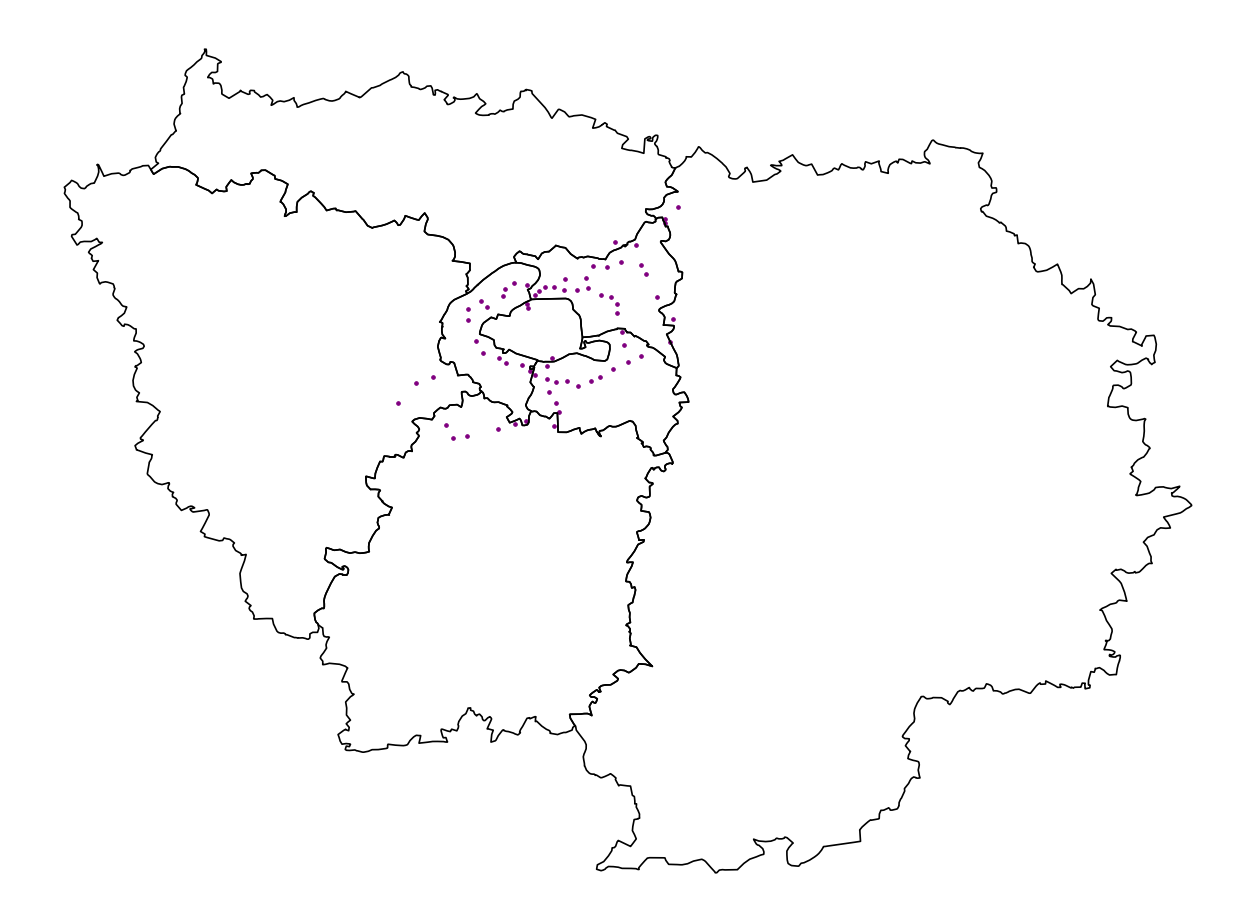

In [44]:
fig = plt.figure(figsize=(20, 15), dpi=80)
plot_IDF()
plot_GPE()
#plt.title("Grand Paris Express Stations",fontsize=20)
plt.axis('off')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-41-5ac0c10856a1>:25: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgradi

(1.3418686780126643, 3.6610301912027374, 48.06449853919552, 49.297345573832764)

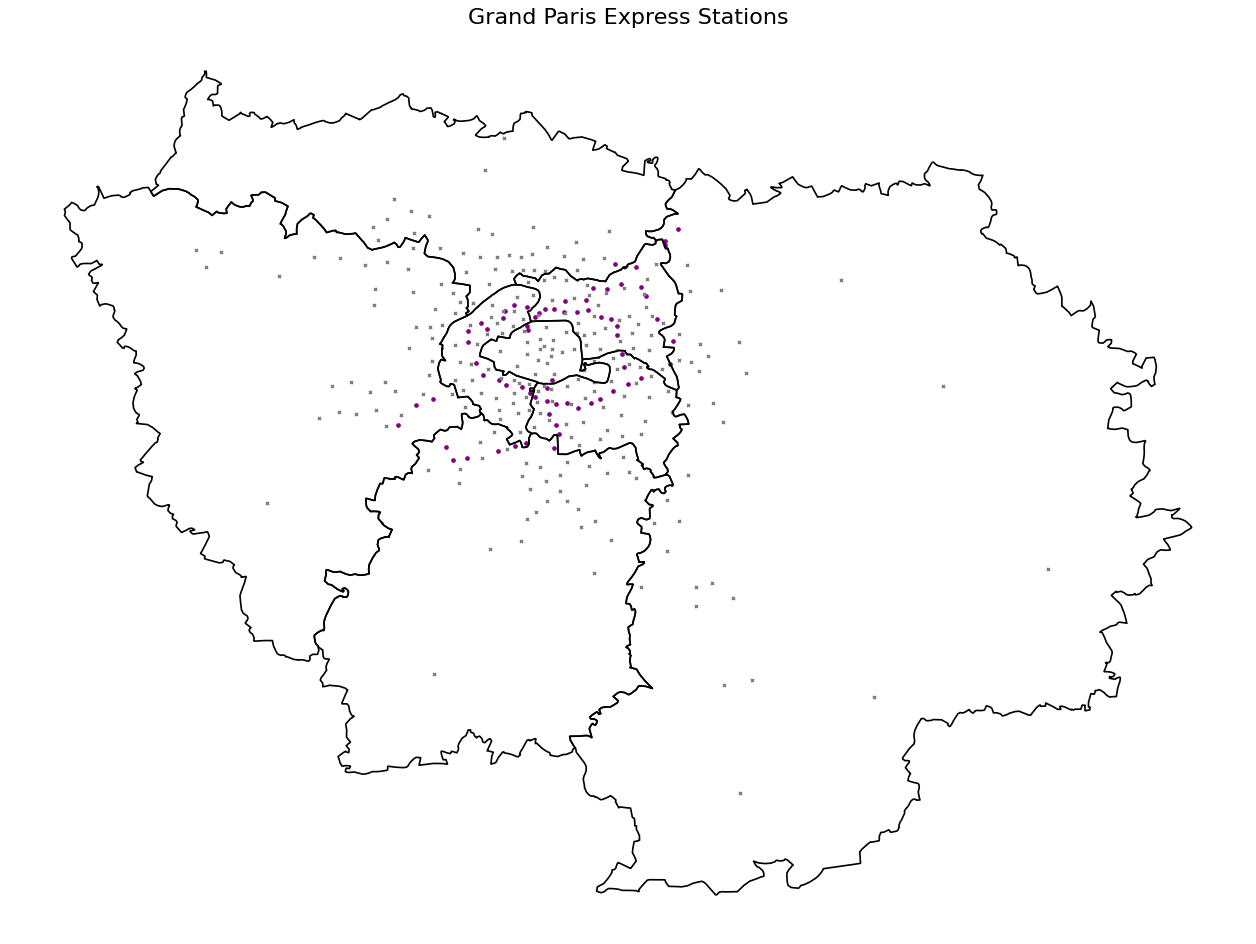

In [45]:
fig = plt.figure(figsize=(20, 15), dpi=80)
plot_IDF()
plot_GPE()


for k in range(n_clusters) :
    plt.scatter(G[k][1],G[k][0],color="gray",s=7,marker="x")
plt.title("Grand Paris Express Stations",fontsize=20)
plt.axis('off')

In [46]:
from math import radians, cos, sin, asin, sqrt
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

def count_stations(x1,x2,max_radius) :
    sf_gpe = shp.Reader("../data/GPE_GARE_LOCALISATION.shp")

    inProj = Proj(init='epsg:3949')
    outProj = Proj(init='epsg:4326')

    X,Y=[],[]
    for shape in sf_gpe.shapes() : 
        [[x1,y1]]=shape.points
        x2,y2 = transform(inProj,outProj,x1,y1)
        X.append(x2)
        Y.append(y2)
    
    n = len(X)

    count = 0

    for i in range(n) :
        if haversine_distance(x1,x2,X[i],Y[i]) <= max_radius :
            count += 1
    
    return count

In [47]:
def gpe_score(df) :
    sf_gpe = shp.Reader("../data/GPE_GARE_LOCALISATION.shp")

    inProj = Proj(init='epsg:3949')
    outProj = Proj(init='epsg:4326')

    X,Y=[],[]
    for shape in sf_gpe.shapes() : 
        [[x1,y1]]=shape.points
        x2,y2 = transform(inProj,outProj,x1,y1)
        X.append(x2)
        Y.append(y2)
    
    n = len(X)

    GPE_Scores = []

    for index,row in df.iterrows(): 
        score = 0
        [lat,lon] = list(map(float,row[8].split(",")))
        for i in range(len(X)) :
            dist = haversine_distance(lat,lon,Y[i],X[i])
            score += 1.0/np.exp(dist/2)
            #elif dist <=3 :
            #    score += 1.0/3**2
            #elif dist <=5 : 
            #    score += 1.0/5**2
            #elif dist <=10 :
            #    score += 1.0/10**2
        GPE_Scores.append(score)
    return GPE_Scores

if 'GrandParisExpress Score' in df.columns:  
    df.pop("GrandParisExpress Score")
if 'B/GPE Class' in df.columns:  
    df.pop("B/GPE Class")
df.insert(8,"GrandParisExpress Score",gpe_score(df))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-47-94ed00066535>:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgradi

In [48]:
# df.sort_values(by="GrandParisExpress Score", ascending=False).sort_values(by="Building Score", ascending=False).head(30).head(30)
#df.sort_values(by="GrandParisExpress Score", ascending=False).head(30).head(30)
#df


## 2D clusterization

0 green
1 blue
2 orange
3 red


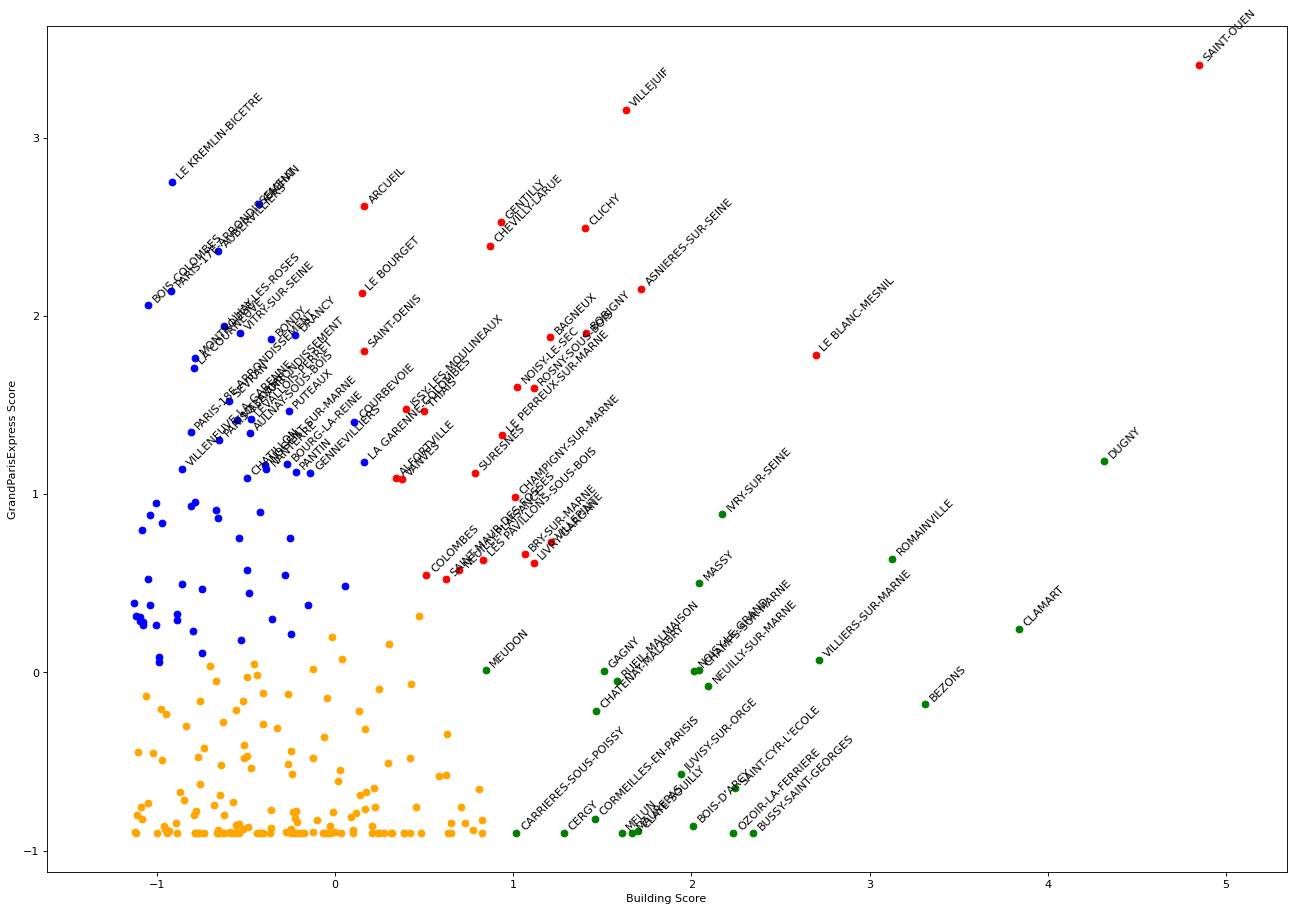

,Insee code,Postal code,City Name,Department,Population,Number of Building Permit,Building Score,Building class,GrandParisExpress Score,B/GPE Class,GeoPoint
0,94069,94410,SAINT-MAURICE,VAL-DE-MARNE,14.4,224,-0.351498,0,0.299054,1,"48.8184921372,2.4374501342"
1,92009,92270,BOIS-COLOMBES,HAUTS-DE-SEINE,28.2,46,-1.050918,0,2.059713,1,"48.9153368426,2.26738552597"
2,95268,95140,GARGES-LES-GONESSE,VAL-D'OISE,40.2,302,-0.755504,0,-0.163155,2,"48.9701231267,2.40534038501"
3,94003,94110,ARCUEIL,VAL-DE-MARNE,19.5,503,0.162822,2,2.617243,3,"48.8058803597,2.33351024984"
4,91228,91000,EVRY,ESSONNE,52.4,753,-0.411037,0,-0.899904,2,"48.6294831659,2.44008244492"
...,...,...,...,...,...,...,...,...,...,...,...
261,92019,92290,CHATENAY-MALABRY,HAUTS-DE-SEINE,32.4,1674,1.462362,1,-0.218722,0,"48.7681690197,2.26282598525"
262,95539,95350,SAINT-BRICE-SOUS-FORET,VAL-D'OISE,14.2,6,-1.111630,0,-0.797850,2,"49.0019033624,2.35030688962"
263,77337,77186,NOISIEL,SEINE-ET-MARNE,15.5,355,0.017575,2,-0.609765,2,"48.8460926469,2.61997100426"
264,91692,91940,LES ULIS,ESSONNE,24.7,55,-1.021005,0,-0.454910,2,"48.680321482,2.18518955"


In [49]:
scaler = StandardScaler()

B_S = df["Building Score"].to_numpy()
GPE_S = df["GrandParisExpress Score"].to_numpy()

B_GPE_S = [[B_S[i],GPE_S[i]] for i in range(len(B_S))]

scaled_scores = scaler.fit_transform(B_GPE_S)
SB = [v[0] for v in scaled_scores]
SG = [v[1] for v in scaled_scores]
df["Building Score"] = SB 
df["GrandParisExpress Score"] = SG

n_clusters2 = 4

colors = ["green","blue","orange","red","purple"]

kmeans2D = cluster.KMeans(n_clusters=n_clusters2)
kmeans2D = kmeans.fit(scaled_scores)
centers = kmeans2D.cluster_centers_
labels = kmeans2D.labels_

fig = plt.figure(figsize=(20, 14), dpi=80)

for i in range(len(scaled_scores)) :
    x = scaled_scores[i][0]
    y = scaled_scores[i][1]
    if ((x+1)**2 + (y+1)**2)**0.5 > 2 :
        plt.annotate(df["City Name"][i],(x,y),xytext=(3.,3.),textcoords='offset pixels',rotation=45)

S = [ [] for k in range(n_clusters2) ]
for i in range(len(scaled_scores)) :
    for k in range(n_clusters2) :
        if labels[i] == k :
            S[k].append(scaled_scores[i])
            break



for k in range(n_clusters2) :
    print(k,colors[k])
    plt.scatter([v[0] for v in S[k]],[v[1] for v in S[k]],color=colors[k])


plt.xlabel("Building Score")
plt.ylabel("GrandParisExpress Score")
plt.axis('equal')
plt.show()

df.insert(9,"B/GPE Class",labels)
df


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-41-5ac0c10856a1>:25: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgradi

0 green
1 blue
2 orange
3 red


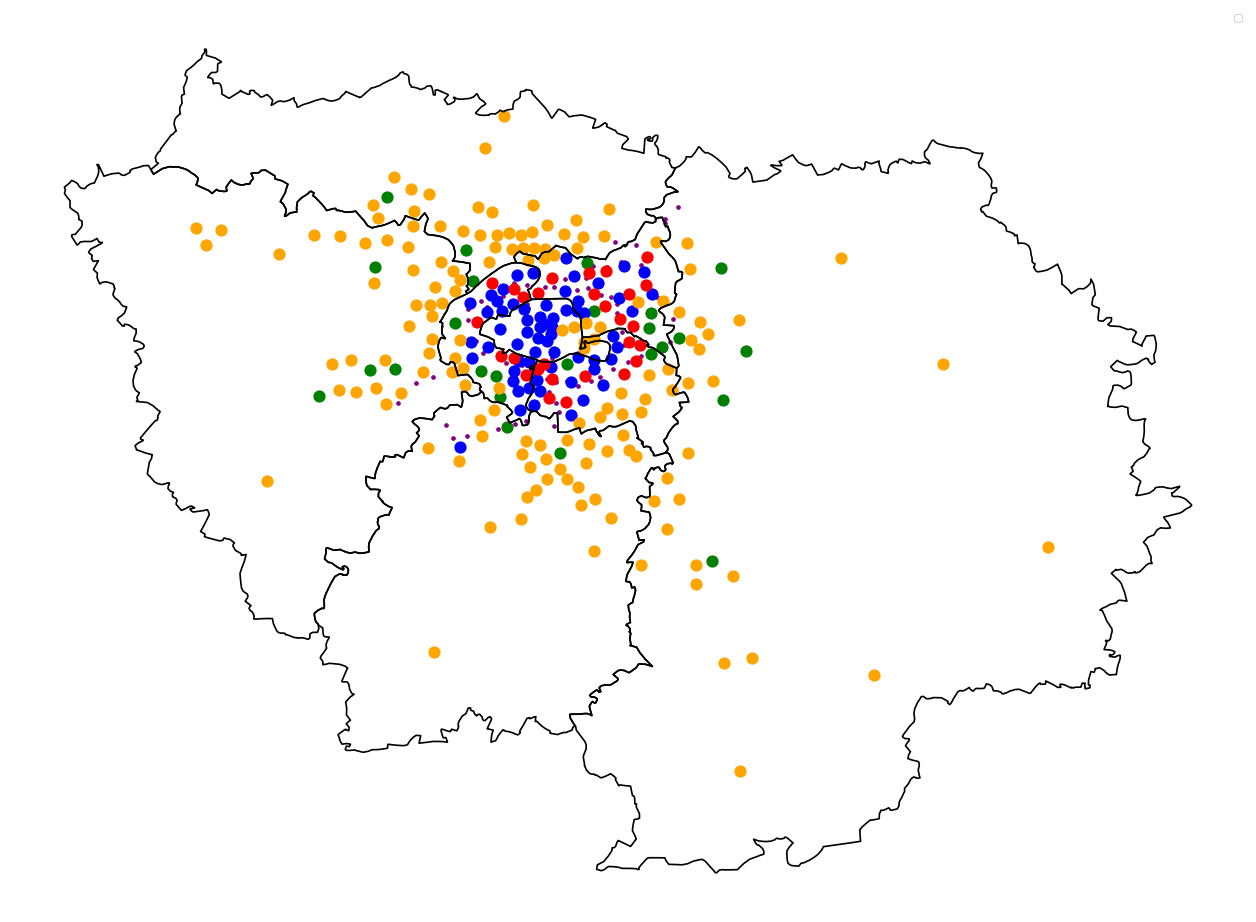

In [50]:
G = [ [[],[],[]] for k in range(n_clusters2) ]
first_value = [ [] for k in range(n_clusters2) ]

for index,row in df.iterrows(): 
    for k in range(n_clusters2) :
        if row["B/GPE Class"] == k :
            [lat, lon] = list(map(float,row["GeoPoint"].split(","),))
            G[k][0].append(lat)
            G[k][1].append(lon)
            G[k][2].append(row["City Name"])
            break



fig = plt.figure(figsize=(20, 15), dpi=80)

#plt.title("Île-de-France Building and GPExpress clusterization",fontsize=30)

## PLOTING IDF

plot_IDF()
plot_GPE()

## PLOTTING CITIES


for k in range(n_clusters2) :
    print(k,colors[k])
    plt.scatter(G[k][1],G[k][0],s=100,color=colors[k])

plt.axis('off')
plt.legend()
plt.show()

In [53]:
#df.to_csv(r'../outputs/idf_clusterized_cities.csv',index=False)
df

,Insee code,Postal code,City Name,Department,Population,Number of Building Permit,Building Score,Building class,GrandParisExpress Score,B/GPE Class,GeoPoint
0,94069,94410,SAINT-MAURICE,VAL-DE-MARNE,14.4,224,-0.351498,0,0.299054,1,"48.8184921372,2.4374501342"
1,92009,92270,BOIS-COLOMBES,HAUTS-DE-SEINE,28.2,46,-1.050918,0,2.059713,1,"48.9153368426,2.26738552597"
2,95268,95140,GARGES-LES-GONESSE,VAL-D'OISE,40.2,302,-0.755504,0,-0.163155,2,"48.9701231267,2.40534038501"
3,94003,94110,ARCUEIL,VAL-DE-MARNE,19.5,503,0.162822,2,2.617243,3,"48.8058803597,2.33351024984"
4,91228,91000,EVRY,ESSONNE,52.4,753,-0.411037,0,-0.899904,2,"48.6294831659,2.44008244492"
...,...,...,...,...,...,...,...,...,...,...,...
261,92019,92290,CHATENAY-MALABRY,HAUTS-DE-SEINE,32.4,1674,1.462362,1,-0.218722,0,"48.7681690197,2.26282598525"
262,95539,95350,SAINT-BRICE-SOUS-FORET,VAL-D'OISE,14.2,6,-1.111630,0,-0.797850,2,"49.0019033624,2.35030688962"
263,77337,77186,NOISIEL,SEINE-ET-MARNE,15.5,355,0.017575,2,-0.609765,2,"48.8460926469,2.61997100426"
264,91692,91940,LES ULIS,ESSONNE,24.7,55,-1.021005,0,-0.454910,2,"48.680321482,2.18518955"


In [64]:
import requests
from math import isnan
import io
from copy import copy


ppsmdict = {}

for index,row in df.iterrows() :
    insee_code = str(row["Insee code"])
    print(index,insee_code)
    PPSM = []
    for year in range(2016,2022) :
        url = f"https://files.data.gouv.fr/geo-dvf/latest/csv/{str(year)}/communes/{insee_code[0:2]}/{insee_code}.csv"
        s=requests.get(url).content
        c=pd.read_csv(io.StringIO(s.decode('utf-8')))
        ppsm_city = [] # mean price per square meter of a city  
        for index, row in c.iterrows():
            try :
                if not isnan(row["valeur_fonciere"]) and not isnan(row["surface_reelle_bati"]) :
                    # print(row["valeur_fonciere"],row["surface_reelle_bati"],row["valeur_fonciere"]/row["surface_reelle_bati"])
                    ppsm_city.append(row["valeur_fonciere"]/row["surface_reelle_bati"])
            except KeyError :
                print("KeyError on ",insee_code)
        ppsm_city.sort()
        if len(ppsm_city) != 0 :
            PPSM.append(ppsm_city[len(ppsm_city)//2])
    ppsmdict[insee_code]=copy(PPSM)

print(ppsmdict)



0 94069
1 92009
2 95268
3 94003
4 91228
5 93071
6 93079
7 77305
8 78551
9 92012
10 95323
11 91657
12 75116
13 77118
14 93057
15 91286
16 93013
17 92023
18 93046
19 92078
20 78650
21 94058
22 77514
23 95598
24 75105
25 94073
26 95203
27 92035
28 93072
29 95555
30 92024
31 92002
32 92060
33 75106
34 92071
35 77122
36 91386
37 93014
38 95500
39 95607
40 78208
41 75117
42 92046
43 93061
44 78123
45 93047
46 94004
47 94037
48 93050
49 77243
50 75120
51 94015
52 94059
53 77108
54 78640
55 95063
56 95313
57 95127
58 78517
59 78586
60 92036
61 93073
62 94052
63 92025
64 78146
65 78418
66 93048
67 91549
68 92072
69 95680
70 94038
71 94074
72 92050
73 95424
74 77288
75 94041
76 77390
77 75110
78 78490
79 78311
80 75118
81 75107
82 78498
83 78124
84 93059
85 93051
86 94016
87 92014
88 93062
89 75108
90 77083
91 93030
92 78015
93 77333
94 92048
95 75119
96 78073
97 78172
98 92062
99 92026
100 93063
101 92073
102 95582
103 93005
104 93027
105 91182
KeyError on  91182
KeyError on  91182
KeyError on 

In [69]:
import json

with open('../outputs/idf_ppsm.json', 'w') as fp:
    json.dump(ppsmdict, fp)